In [6]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

In [7]:
#definição de parametros antes da construção da CNN

#TODO: melhorar os parametros e fazer de uma forma abstrata que de para usar outros datasets
baseAll = 'ALL-ISIC-2024'
base24 = 'ISIC-2024-CHALLENGE'
n_train = 7007
n_val   = 1003
n_test  = 2005
subtract_mean = True
precision = 'float32'

# usado caso o dataset seja o ALL ISIC 2024 
# base = baseAll
# all_csv = '/kaggle/input/all-isic-data-20240629/metadata.csv'
# all_df = pd.read_csv(all_csv, low_memory=False)
# df = all_df
# print(all_df)

# usado caso o dataset seja o ISIC 2024 CHALLENGE
base = base24
isic24_train_csv = '/kaggle/input/isic-2024-challenge/train-metadata.csv'
isic24_train_df = pd.read_csv(isic24_train_csv, low_memory=False)
df = isic24_train_df
print(df)

# df['benign_malignant'].value_counts()
# df['benign_malignant'].value_counts(dropna=False)
df.columns

             isic_id  target  patient_id  age_approx     sex  \
0       ISIC_0015670       0  IP_1235828        60.0    male   
1       ISIC_0015845       0  IP_8170065        60.0    male   
2       ISIC_0015864       0  IP_6724798        60.0    male   
3       ISIC_0015902       0  IP_4111386        65.0    male   
4       ISIC_0024200       0  IP_8313778        55.0    male   
...              ...     ...         ...         ...     ...   
401054  ISIC_9999937       0  IP_1140263        70.0    male   
401055  ISIC_9999951       0  IP_5678181        60.0    male   
401056  ISIC_9999960       0  IP_0076153        65.0  female   
401057  ISIC_9999964       0  IP_5231513        30.0  female   
401058  ISIC_9999967       0  IP_6426047        50.0    male   

       anatom_site_general  clin_size_long_diam_mm          image_type  \
0          lower extremity                    3.04  TBP tile: close-up   
1                head/neck                    1.10  TBP tile: close-up   
2        

Index(['isic_id', 'target', 'patient_id', 'age_approx', 'sex',
       'anatom_site_general', 'clin_size_long_diam_mm', 'image_type',
       'tbp_tile_type', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
       'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 'tbp_lv_L',
       'tbp_lv_Lext', 'tbp_lv_areaMM2', 'tbp_lv_area_perim_ratio',
       'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
       'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm',
       'tbp_lv_eccentricity', 'tbp_lv_location', 'tbp_lv_location_simple',
       'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border',
       'tbp_lv_norm_color', 'tbp_lv_perimeterMM',
       'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 'tbp_lv_stdLExt',
       'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 'tbp_lv_x', 'tbp_lv_y',
       'tbp_lv_z', 'attribution', 'copyright_license', 'lesion_id',
       'iddx_full', 'iddx_1', 'iddx_2', 'iddx_3', 'iddx_4', 'iddx_5',
       'mel_mitotic_index', '

In [8]:
df.info()
print(df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext                   401059 non-nul

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [9]:
df.describe()

,target,age_approx,clin_size_long_diam_mm,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,...,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,mel_thick_mm,tbp_lv_dnn_lesion_confidence
count,401059.000000,398261.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,...,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,401059.000000,63.000000,4.010590e+05
mean,0.000980,58.012986,3.930827,19.974007,14.919247,28.281706,26.913015,34.786341,30.921279,54.653689,...,1.016459,2.715190,2.238605,0.306823,86.332073,-3.091862,1039.598221,55.823389,0.670952,9.716220e+01
std,0.031288,13.596165,1.743068,3.999489,3.529384,5.278676,4.482994,5.708469,4.829345,5.520849,...,0.734631,1.738165,0.623884,0.125038,52.559511,197.257995,409.819653,87.968245,0.792798,8.995782e+00
min,0.000000,5.000000,1.000000,-2.487115,-9.080269,-0.730989,9.237066,3.054228,11.846520,-1.574164,...,0.000000,0.268160,0.636247,0.052034,0.000000,-624.870728,-1052.134000,-291.890442,0.200000,1.261082e-16
25%,0.000000,50.000000,2.840000,17.330821,12.469740,24.704372,23.848125,31.003148,27.658285,51.566273,...,0.563891,1.456570,1.834745,0.211429,40.000000,-147.022125,746.519673,-8.962647,0.300000,9.966882e+01
50%,0.000000,60.000000,3.370000,19.801910,14.713930,28.171570,26.701704,34.822580,30.804893,55.035632,...,0.902281,2.186693,2.149758,0.282297,90.000000,-5.747253,1172.803000,67.957947,0.400000,9.999459e+01
75%,0.000000,70.000000,4.380000,22.304628,17.137175,31.637429,29.679913,38.430298,33.963868,58.298184,...,1.334523,3.474565,2.531443,0.382022,130.000000,140.474835,1342.131540,126.611567,0.600000,9.999996e+01
max,1.000000,85.000000,28.400000,48.189610,37.021680,54.306900,48.372700,58.765170,54.305290,105.875784,...,11.491140,17.563650,25.534791,0.977055,175.000000,614.471700,1887.766846,319.407000,5.000000,1.000000e+02


In [10]:
df['age_approx'].value_counts()

age_approx
55.0    58123
65.0    54946
60.0    54109
50.0    47924
70.0    39775
40.0    31297
75.0    30801
45.0    23580
80.0    21096
35.0    11543
30.0    10400
85.0     8847
25.0     3433
20.0     1742
15.0      644
5.0         1
Name: count, dtype: int64

In [11]:
df['anatom_site_general'].value_counts()

anatom_site_general
posterior torso    121902
lower extremity    103028
anterior torso      87770
upper extremity     70557
head/neck           12046
Name: count, dtype: int64

In [12]:
df.isna().sum()

isic_id                              0
target                               0
patient_id                           0
age_approx                        2798
sex                              11517
anatom_site_general               5756
clin_size_long_diam_mm               0
image_type                           0
tbp_tile_type                        0
tbp_lv_A                             0
tbp_lv_Aext                          0
tbp_lv_B                             0
tbp_lv_Bext                          0
tbp_lv_C                             0
tbp_lv_Cext                          0
tbp_lv_H                             0
tbp_lv_Hext                          0
tbp_lv_L                             0
tbp_lv_Lext                          0
tbp_lv_areaMM2                       0
tbp_lv_area_perim_ratio              0
tbp_lv_color_std_mean                0
tbp_lv_deltaA                        0
tbp_lv_deltaB                        0
tbp_lv_deltaL                        0
tbp_lv_deltaLB           

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


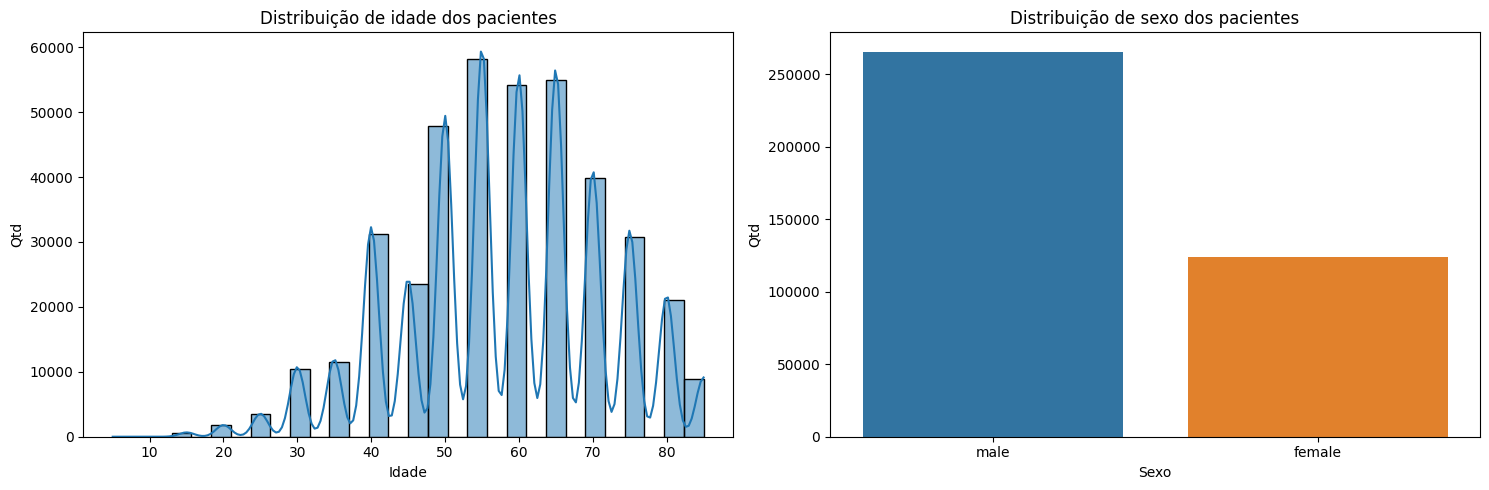

In [13]:
import seaborn as sns

fig1, axes1 = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(df['age_approx'].dropna(), bins=30, kde=True, ax=axes1[0])
axes1[0].set_title('Distribuição de idade dos pacientes')
axes1[0].set_xlabel('Idade')
axes1[0].set_ylabel('Qtd')

sns.countplot(x='sex', data=df, ax=axes1[1])
axes1[1].set_title('Distribuição de sexo dos pacientes')
axes1[1].set_xlabel('Sexo')
axes1[1].set_ylabel('Qtd')

plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


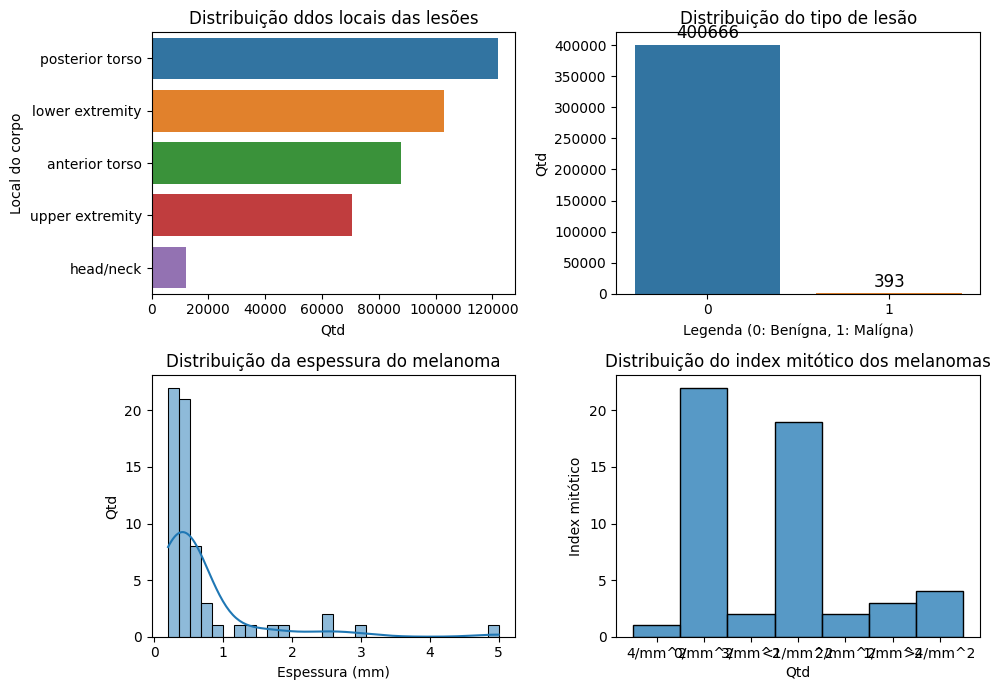

In [21]:
fig2, axes2 = plt.subplots(2, 2, figsize=(10, 7))

sns.countplot(y='anatom_site_general', data=df, order=df['anatom_site_general'].value_counts().index, ax=axes2[0, 0])
axes2[0, 0].set_title('Distribuição ddos locais das lesões')
axes2[0, 0].set_xlabel('Qtd')
axes2[0, 0].set_ylabel('Local do corpo')

# Vẽ biểu đồ countplot
sns.countplot(x='target', data=df, ax=axes2[0, 1])

# Thiết lập tiêu đề và nhãn trục
axes2[0, 1].set_title('Distribuição do tipo de lesão')
axes2[0, 1].set_xlabel('Legenda (0: Benígna, 1: Malígna)')
axes2[0, 1].set_ylabel('Qtd')

for p in axes2[0, 1].patches:
    axes2[0, 1].annotate(
        f'{int(p.get_height())}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', va = 'baseline', 
        fontsize=12, color='black', xytext=(0, 5), 
        textcoords='offset points'
    )
    
sns.histplot(df['mel_thick_mm'].dropna(), bins=30, kde=True, ax=axes2[1, 0])
axes2[1, 0].set_title('Distribuição da espessura do melanoma')
axes2[1, 0].set_xlabel('Espessura (mm)')
axes2[1, 0].set_ylabel('Qtd')

sns.histplot(df['mel_mitotic_index'].dropna(), bins=30, ax=axes2[1, 1])
axes2[1, 1].set_title('Distribuição do index mitótico dos melanomas')
axes2[1, 1].set_ylabel('Index mitótico')
axes2[1, 1].set_xlabel('Qtd')

plt.tight_layout()
plt.show()

<Axes: >

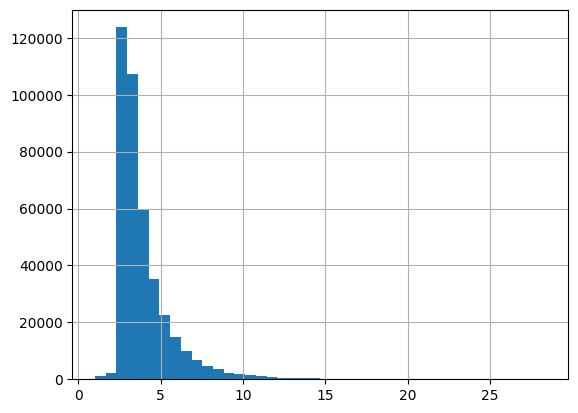

In [19]:
MAGIC_NUM = 42
df['clin_size_long_diam_mm'].hist(bins=MAGIC_NUM)

<Axes: >

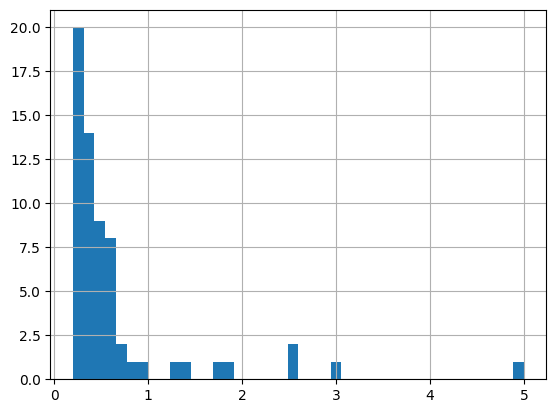

In [18]:
df['mel_thick_mm'].hist(bins=MAGIC_NUM)

In [2]:
#####TESTE#####
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Definição de parâmetros antes da construção da CNN
baseAll = 'ALL-ISIC-2024'
base24 = 'ISIC-2024-CHALLENGE'
n_train = 7007
n_val = 1003
n_test = 2005
subtract_mean = True
precision = 'float32'
img_size = (224, 224)  # Define o tamanho das imagens para redimensionamento

# Carregar metadados do ISIC 2024 CHALLENGE
base = base24
isic24_train_csv = '/kaggle/input/isic-2024-challenge/train-metadata.csv'
isic24_train_df = pd.read_csv(isic24_train_csv, low_memory=False)
print(isic24_train_df.head())

# Colunas disponíveis no dataframe
print(isic24_train_df.columns)

# Carregar o caminho das imagens e as labels (ajuste conforme o dataset específico)
%debug
image_dir = '/kaggle/input/isic-2024-challenge/train-images'  # Ajuste o diretório das imagens conforme o dataset
image_paths = isic24_train_df['image_name'].apply(lambda x: os.path.join(image_dir, f'{x}.jpg')).values
labels = isic24_train_df['benign_malignant'].values

# Converter labels para números (0: benign, 1: malignant)
label_map = {'benign': 0, 'malignant': 1}
labels = np.array([label_map[label] for label in labels])

# Carregar imagens e redimensioná-las para img_size
def load_and_preprocess_images(image_paths, img_size):
    images = []
    for path in image_paths:
        img = load_img(path, target_size=img_size)  # Carrega a imagem com o tamanho especificado
        img = img_to_array(img)  # Converte a imagem para um array numpy
        images.append(img)
    return np.array(images)

# Carregar as imagens
images = load_and_preprocess_images(image_paths, img_size)

# Normalizar as imagens para o intervalo [0, 1]
images = images.astype(precision) / 255.0

# Dividir o dataset em treino, validação e teste
x_train, x_temp, y_train, y_temp = train_test_split(images, labels, train_size=n_train, stratify=labels, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, train_size=n_val, test_size=n_test, stratify=y_temp, random_state=42)

# Converter as labels para o formato categórico (one-hot encoding)
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

# Subtração da média das imagens de treino se necessário
if subtract_mean:
    mean_image = np.mean(x_train, axis=0)
    x_train -= mean_image
    x_val -= mean_image
    x_test -= mean_image

# Verificação da dimensão dos conjuntos de dados
print(f'Tamanho de x_train: {x_train.shape}')
print(f'Tamanho de x_val: {x_val.shape}')
print(f'Tamanho de x_test: {x_test.shape}')

        isic_id  target  patient_id  age_approx   sex anatom_site_general  \
0  ISIC_0015670       0  IP_1235828        60.0  male     lower extremity   
1  ISIC_0015845       0  IP_8170065        60.0  male           head/neck   
2  ISIC_0015864       0  IP_6724798        60.0  male     posterior torso   
3  ISIC_0015902       0  IP_4111386        65.0  male      anterior torso   
4  ISIC_0024200       0  IP_8313778        55.0  male      anterior torso   

   clin_size_long_diam_mm          image_type tbp_tile_type   tbp_lv_A  ...  \
0                    3.04  TBP tile: close-up     3D: white  20.244422  ...   
1                    1.10  TBP tile: close-up     3D: white  31.712570  ...   
2                    3.40  TBP tile: close-up        3D: XP  22.575830  ...   
3                    3.22  TBP tile: close-up        3D: XP  14.242329  ...   
4                    2.73  TBP tile: close-up     3D: white  24.725520  ...   

    lesion_id  iddx_full  iddx_1  iddx_2  iddx_3  iddx_4  iddx

KeyError: 'image_name'